In [4]:
import pandas as pd
import numpy as np
import numpy.random as npr
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import optuna
import sys
# check env
import gymnasium as gym
from gymnasium.utils.env_checker import check_env
from stable_baselines3.ppo import PPO
# add market_maker_algos to path
sys.path.append('../')
from market_maker_algos.envs import AvellanedaStoikovEnv, LehalleEnv
from market_maker_algos.data_loader import (
    SingleBrownianMotion, 
    RandomCoveredWarrantLoader
)
from market_maker_algos.common import plot_result, play
from market_maker_algos.algorithms import AvellanedaStoikov
import matplotlib.pyplot as plt

check_env(LehalleEnv(data_loader=RandomCoveredWarrantLoader('../temp/cw_1m_sample.csv')))

/Users/manbnm/miniconda3/envs/mm_env/lib/python3.10/site-packages/gymnasium/utils/env_checker.py:247: UserWarning: WARN: For Box action spaces, we recommend using a symmetric and normalized space (range=[-1, 1] or [0, 1]). See https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html for more information.
  logger.warn(
/Users/manbnm/miniconda3/envs/mm_env/lib/python3.10/site-packages/gymnasium/utils/env_checker.py:229: UserWarning: WARN: A Box observation space maximum value is -infinity. This is probably too high.
  logger.warn(
/Users/manbnm/miniconda3/envs/mm_env/lib/python3.10/site-packages/gymnasium/utils/env_checker.py:321: UserWarning: WARN: Not able to test alternative render modes due to the environment not having a spec. Try instantialising the environment through gymnasium.make
  logger.warn(


# Avellaneda Stoikov

In [ ]:
INIT_VALUE = 100
N_SAMPLE = 250
SIGMA = 2
N_SIMULATION = 100

data_loader = SingleBrownianMotion(
    init_value=INIT_VALUE,
    n_sample=N_SAMPLE,
    sigma=SIGMA,
)
env = AvellanedaStoikovEnv(
    data_loader=data_loader,
    risk_factor=0.2,
    k=1.5
)
policy = AvellanedaStoikov(order_quantity=1)

In [ ]:
navs = []
for i in range(N_SIMULATION):
    historical_df = play(policy, env)
    navs.append(historical_df['nav'].iloc[-1])

mean_nav = np.mean(navs)
std_nav = np.std(navs)
print(f'Average daily PnL: {mean_nav: .2f} +/- {std_nav: .2f}')

In [ ]:
historical_df = play(policy=policy, env=env)
plot_result(historical_df)

# 1min CW (Lehalle Env)

In [ ]:
# risk_factor = 0.1
# k = 1.5

cw_loader = RandomCoveredWarrantLoader(path='../temp/cw_1m_sample.csv')

# def objective(trial):
#     risk_factor = trial.suggest_float('risk_factor', 0, 1)
#     k = trial.suggest_float('k', 0, 5)
#     env = LehalleEnv(data_loader=cw_loader, risk_factor=risk_factor, k=k)
#     policy = AvellanedaStoikov(order_quantity=1)
#     historical_df = play(policy, env)
#     pnl = -historical_df['nav'].iloc[-1]
#     return pnl

# study = optuna.create_study()
# study.optimize(objective, n_trials=400)
# study.best_params, study.best_value

In [2]:
cw_loader = RandomCoveredWarrantLoader(path='../temp/cw_1m_sample.csv')

{'type': 'covered_warrant', 'date': '2023-08-10', 'sec_cd': 'CNVL2302', 'dt': 0.0030211480362537764, 'total_time': 331, 'sigma': 0.0002}


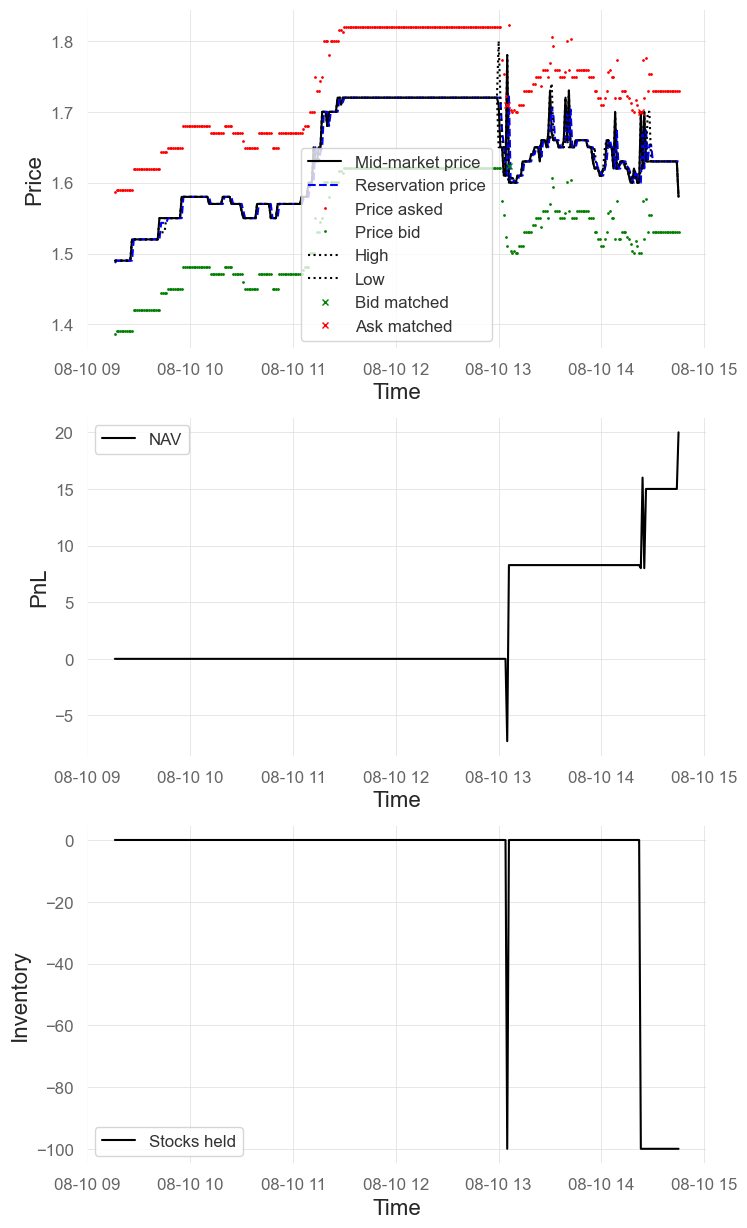

In [3]:
risk_factor = 0.1
k = 10
env = LehalleEnv(data_loader=cw_loader, risk_factor=risk_factor, k=k)
policy = AvellanedaStoikov(order_quantity=100)
historical_df = play(policy, env)
plot_result(historical_df)

# Test

In [ ]:
merge_data = resample_data.merge(test_data, left_index=True, right_index=True)
merge_data['open_diff'] = merge_data['open_x'] - merge_data['open_y']
merge_data['high_diff'] = merge_data['high_x'] - merge_data['high_y']
merge_data['low_diff'] = merge_data['low_x'] - merge_data['low_y']
merge_data['close_diff'] = merge_data['close_x'] - merge_data['close_y']
merge_data['volume_diff'] = merge_data['volume_x'] - merge_data['volume_y']

In [ ]:
merge_data["open_diff high_diff low_diff close_diff volume_diff".split()].describe()